# Ingesta y Limpieza de Datos

## Librerías

In [2]:
import os
import sys
import pandas as pd
import missingno as msno
import datetime as datetime

sys.path.append(os.path.abspath(".."))
import packages.Preprocesamiento as ppr

## Carga de datos

In [3]:
datos = ppr.leer_datos('cancellation_data_for_mondragon_unibertsitatea_2024.csv', origen="org")

In [4]:
datos

,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,travel_agency_name,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
booked_at,,,,,,,,,,,,,,,,,,,,,
"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,Booking.com,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,Booking.com,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,Booking.com,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,Booking.com,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,Booking.com,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Oct 13, 2023, 13:38","Dec 31, 2023, 15:00","Jan 1, 2024, 11:00",79,1,December,Sunday,4,0,telephone,Booking.com,...,1,yes,no,0,169.6,169.6,checked_out,NaN,NaN,NaN
"Oct 13, 2023, 13:38","Dec 31, 2023, 15:00","Jan 1, 2024, 11:00",79,1,December,Sunday,4,0,telephone,Booking.com,...,1,yes,no,0,169.6,169.6,checked_out,NaN,NaN,NaN
"Oct 17, 2023, 08:36","Dec 31, 2023, 15:00","Jan 1, 2024, 11:00",75,1,December,Sunday,5,0,direct_channel,NaN,...,1,yes,no,0,647.28,647.28,checked_out,NaN,NaN,NaN


## Limpieza y preprocesado

#### Vistazo general de los datos

In [5]:
datos.head()

,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,travel_agency_name,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
booked_at,,,,,,,,,,,,,,,,,,,,,
"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,Booking.com,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,Booking.com,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,Booking.com,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,Booking.com,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,Booking.com,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN


In [6]:
datos.shape

(56448, 35)

56.448 filas y 35 columnas

Cambiar "booked_at" de índice a columna

In [7]:
datos = datos.reset_index()

#### Comprobación de tipos

In [8]:
datos.dtypes

booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed        object
last_entry_form_completed_at     object


### Cambios de tipo a realizar
Eliminar columna brand
| Variable | Tipo Original | Transformación |
| :--- | :--- | :--- |
| booked_at | Str | Fecha |
| checkin_time | Str | Fecha |
| checkout_time | Str | Fecha |
| checkin_month | Str | Fecha (Mes del año) |
| checkin_day | Str | Fecha (Día Semana) |
| origin | Str | Categórica |
| travel_agency_name | Str | Categórica |
| requested_category | Str | Categórica |
| requested_category_name | Str | Categórica |
| asset | Str | Categórica |
| asset_type | Str | Categórica |
| asset_opening_date | Str | Fecha |
| business_segment | Str | Categórica |
| rate | Str | Categórica |
| rate_group_name | Str | Categórica |
| rate_type | Str | Categórica |
| all_entry_forms_completed | Str | Bool |
| last_entry_form_completed_at | Str | Fecha |
| returning_inhabitant | Str | Bool |
| libere_community | Str | Bool |
| bought_products | Str | Bool |
| reservation_net_value | Str | Float |
| total_adr | Str | Float |
| status | Str | Bool |
| cancelled_at | Str | Fecha |
| cancellation_reason | Str | Categórica |
| cancellation_lead_time | Str | Fecha (Días) |

In [9]:
# Eliminar columna brand
if 'brand' in datos.columns:
    datos.drop(columns=['brand'], inplace=True)

'brand' in datos.columns # Comprobamos que hemos eliminado bien la columna y efectivamente, sí

False

Para convertir a categóricas primero comprobamos que las variables categoricas que sabemos que solo pueden tener unos valores esten correctas

In [10]:
datos['checkin_day'].unique() # Están tan solo los 7 días de la semana -> Correcto

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [11]:
datos['checkin_month'].unique() # Están tan solo los 12 meses del año -> Correcto

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [12]:
# Convertir todas las variables categóricas

cols_categoricas = (
    'checkin_month',
    'checkin_day',
    'origin',
    'travel_agency_name',
    'requested_category',
    'requested_category_name',
    'asset',
    'asset_type',
    'business_segment',
    'rate',
    'rate_group_name',
    'rate_type',
    'status',
    'cancellation_reason'
)

diccionario_tipos_cols = dict.fromkeys(cols_categoricas, 'category')

datos = datos.astype(diccionario_tipos_cols)
datos[diccionario_tipos_cols.keys()].dtypes

checkin_month              category
checkin_day                category
origin                     category
travel_agency_name         category
requested_category         category
requested_category_name    category
asset                      category
asset_type                 category
business_segment           category
rate                       category
rate_group_name            category
rate_type                  category
status                     category
cancellation_reason        category
dtype: object

In [13]:
# Convertir las de tipo booleano
# Se ha mirado previamente que todas estas columnas no tienen NAs y la respuesta es "yes" o "no"
cols_bool = [
    'all_entry_forms_completed',
    'returning_inhabitant',
    'libere_community',
    'bought_products'
]

bool_mapping = {'yes': True, 'no': False}

for col in cols_bool:
    datos[col] = datos[col].str.lower().map(bool_mapping).astype(bool)

datos[cols_bool].dtypes # Cambios bien realizados 

all_entry_forms_completed    bool
returning_inhabitant         bool
libere_community             bool
bought_products              bool
dtype: object

In [14]:
# Convertir a numérico adecuado
def columna_a_numerico(df: pd.DataFrame, col: str):
    if df[col].dtype == 'object':
        # Quitar las comas que indican cambio de centena (pero no decimal)
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)

    df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

cols_numericas = [
    'reservation_net_value',
    'total_adr'
]

for col in cols_numericas:
    datos = columna_a_numerico(datos, col)

datos[cols_numericas].dtypes # Cambios bien realizados 

reservation_net_value    float64
total_adr                float64
dtype: object

In [15]:
# Para evitar problemas primero se va a pasar el mes de formato iniciales del nombre a número
meses = [mes[:3] for mes in datos['checkin_month'].unique()]
n_meses = [f'{n_mes:0>2}' for n_mes in range(1, 13)]
diccionario_meses = dict(zip(meses, n_meses))


# Convertir a datetime
formato_fecha = '%m %d, %Y, %H:%M' # Teniendo en cuenta que se ha cambiado el formato del mes
cols_fecha = (
    'booked_at',
    'checkin_time',
    'checkout_time',
    'asset_opening_date',
    'last_entry_form_completed_at',
    'cancelled_at'
)

for col in cols_fecha:
    temp_col = datos[col].astype(str)
    for mes_txt, mes_num in diccionario_meses.items():
        temp_col = temp_col.str.replace(mes_txt, mes_num, regex=False)

    datos[col] = pd.to_datetime(temp_col, format=formato_fecha, errors='coerce')

Comprobamos de nuevo que todos los cambios los hayamos realizado bien

In [16]:
datos.dtypes

booked_at                       datetime64[ns]
checkin_time                    datetime64[ns]
checkout_time                   datetime64[ns]
lead_time                                int64
lenght_of_stay                           int64
checkin_month                         category
checkin_day                           category
adult_count                              int64
child_count                              int64
origin                                category
travel_agency_name                    category
requested_category                    category
requested_category_name               category
asset                                 category
asset_type                            category
asset_opening_date              datetime64[ns]
available_units                          int64
business_segment                      category
rate                                  category
rate_group_name                       category
rate_type                             category
completed_ent

In [17]:
datos.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,4,False,False,0,15.92,15.92,checked_out,NaT,NaN,NaN
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,2,True,False,0,117.78,13.09,checked_out,NaT,NaN,NaN
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,1,False,True,8,755.65,125.94,checked_out,NaT,NaN,NaN
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,1,False,True,1,186.37,186.37,checked_out,NaT,NaN,NaN
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,1,False,False,0,77.02,77.02,checked_out,NaT,NaN,NaN


## Análisis de duplicados

In [18]:
datos[datos.duplicated()]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
63,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,True,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
65,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,True,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
66,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,False,0,21.07,21.07,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
83,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,4,0,email,...,1,False,True,4,274.53,91.51,checked_out,NaT,NaN,NaN
85,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,3,0,email,...,1,False,True,4,251.34,83.78,checked_out,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,False,True,1,154.76,154.76,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0
56143,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,False,True,1,154.76,154.76,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0
56144,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,False,False,0,141.38,141.38,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0
56181,2023-03-03 19:39:00,2023-11-23 15:00:00,2023-11-25 11:00:00,265,2,November,Thursday,2,0,channel_manager,...,1,False,False,0,430.79,215.40,cancelled,2023-11-15 21:13:00,changed_plans,257.0


In [19]:
n_duplicados = datos[datos.duplicated()].shape[0]
print(f'Hay {n_duplicados} duplicados, un {n_duplicados/datos.shape[0]:.2%} del total de datos.')

Hay 2306 duplicados, un 4.09% del total de datos.


In [20]:
# Quitar todos los duplicados
datos = datos[~datos.duplicated()]

## Análisis de missings

<Axes: >

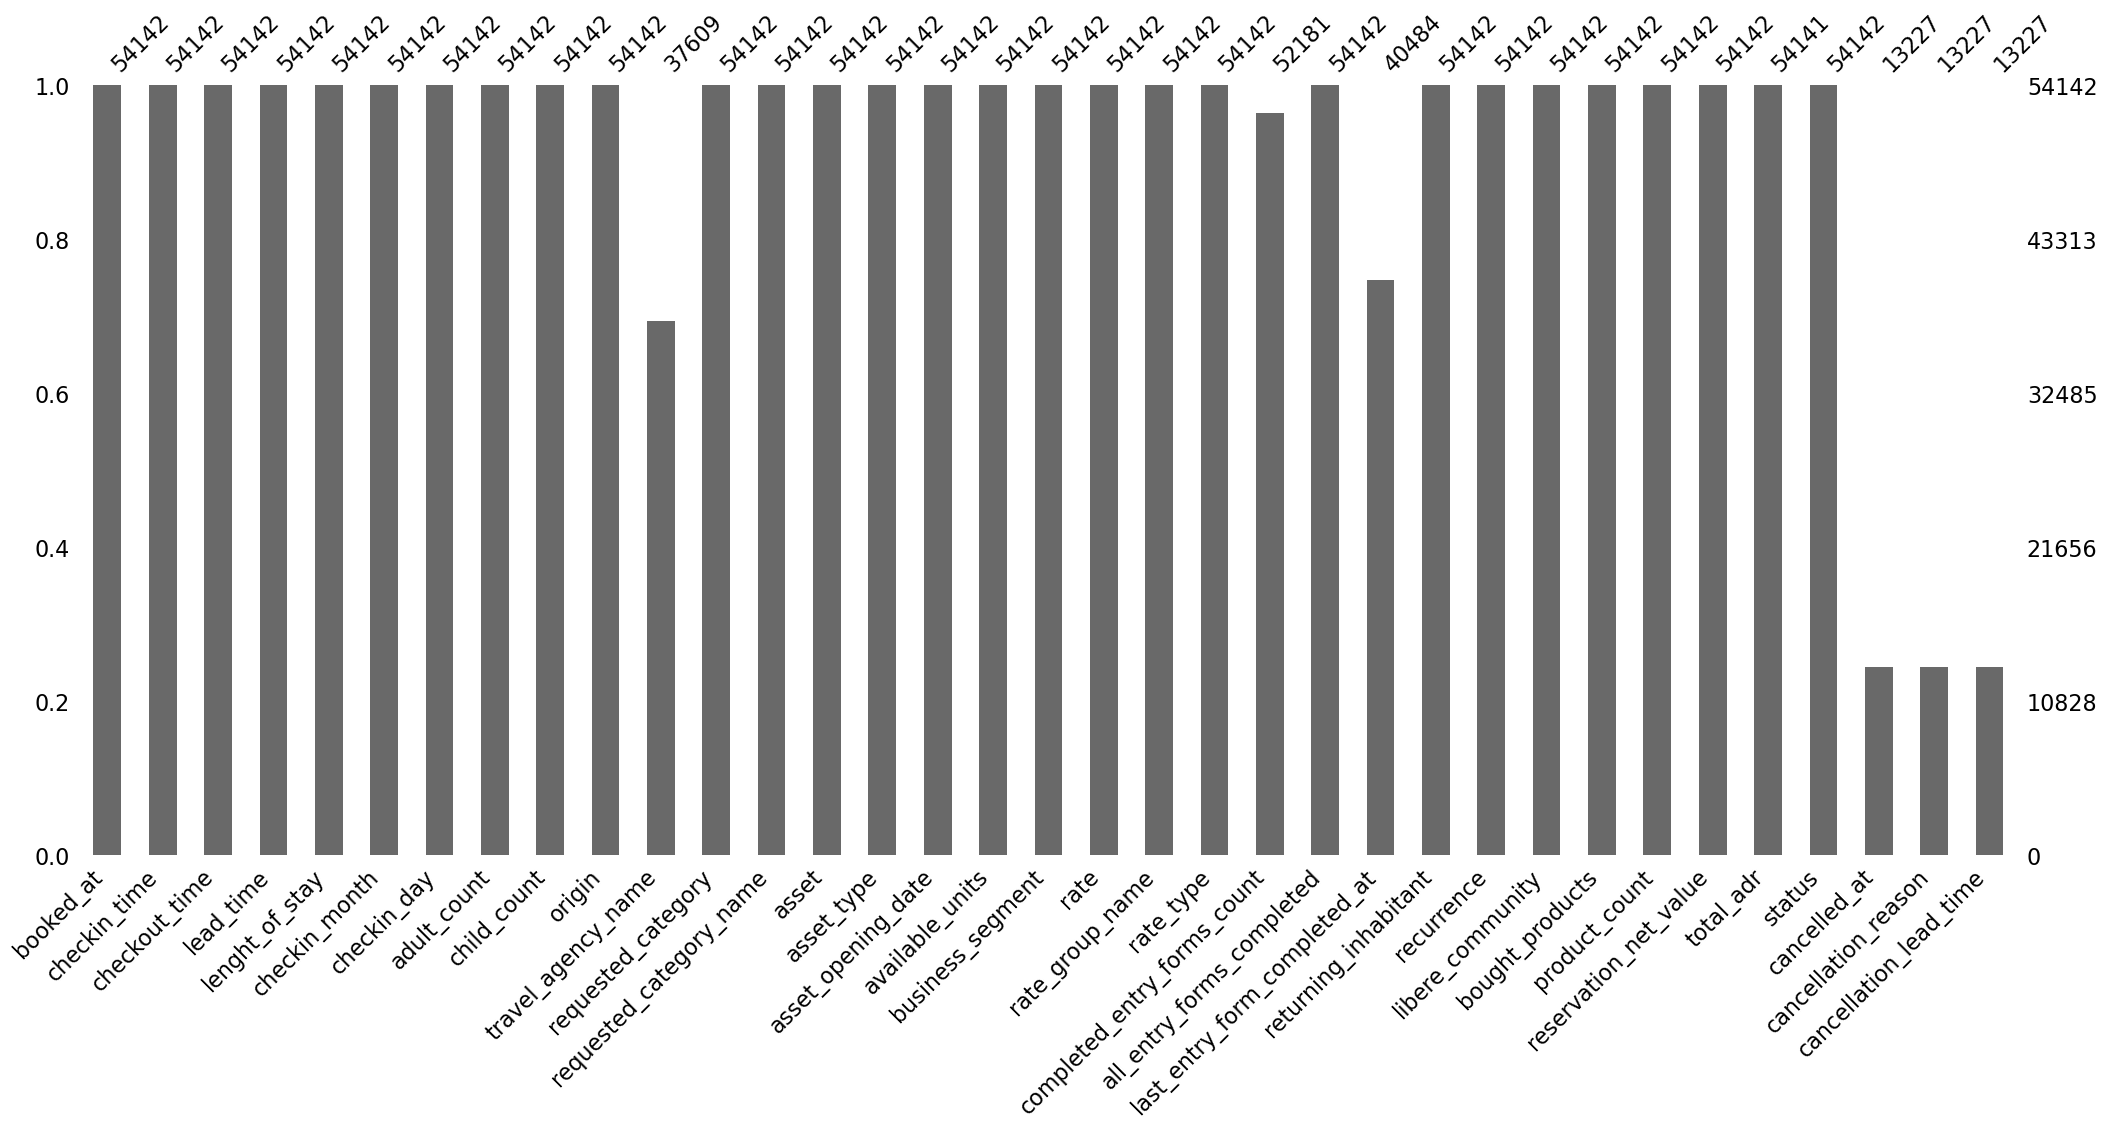

In [21]:
msno.bar(datos)

<Axes: >

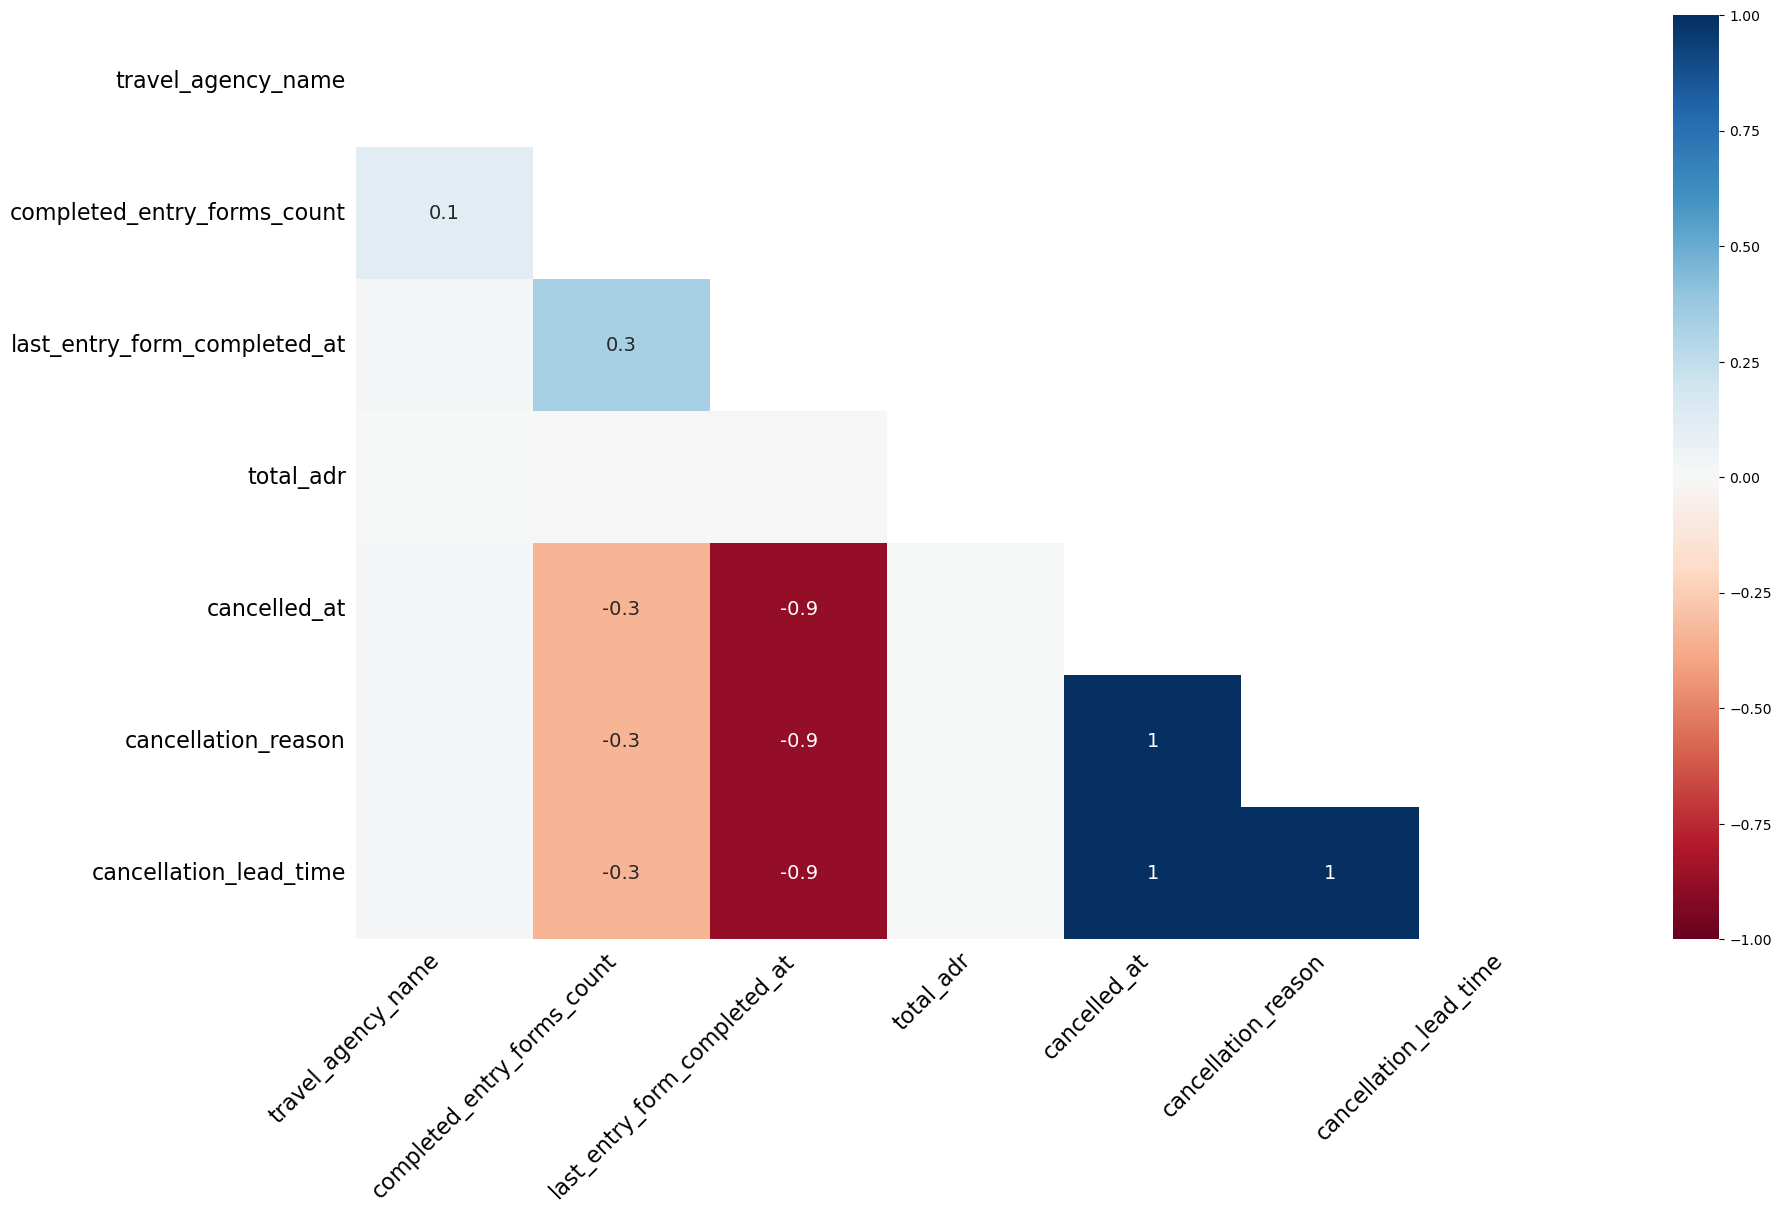

In [22]:
msno.heatmap(datos)

<Axes: >

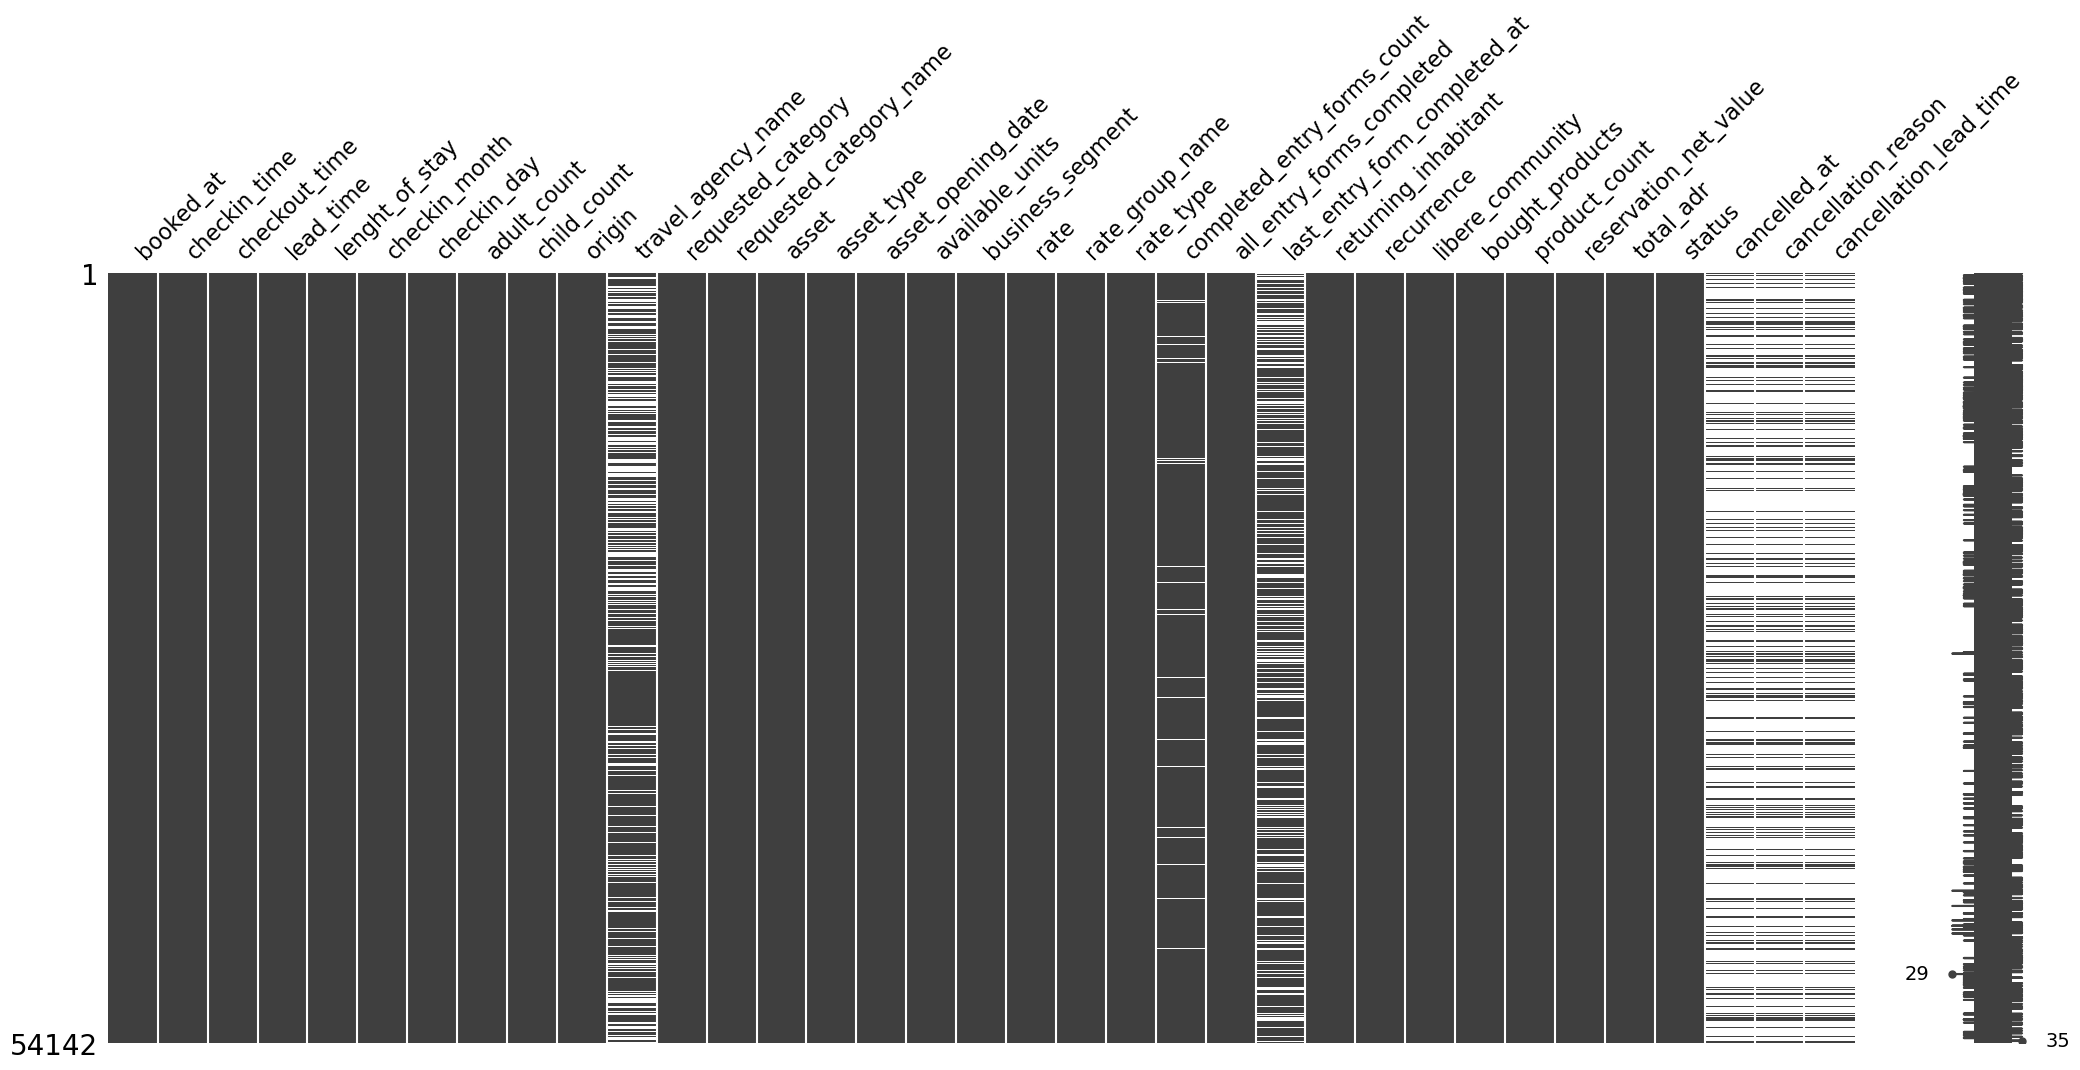

In [23]:
msno.matrix(datos)

La variable de la agencia de viaje tiene NA cuando la reserva no se ha hecho a través de ese medio, por lo que lo sustituiremos con el texto "On their own"

In [24]:
# Al ser dato categorico hay que añadir esa posibilidad primero, sino no deja sustituir los NAs por ese valor
datos['travel_agency_name'] = datos['travel_agency_name'].cat.add_categories(['On their own'])
datos['travel_agency_name'] = datos['travel_agency_name'].fillna('On their own')

In [25]:
datos[datos['cancelled_at'].isna()]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,4,False,False,0,15.92,15.92,checked_out,NaT,NaN,NaN
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,2,True,False,0,117.78,13.09,checked_out,NaT,NaN,NaN
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,1,False,True,8,755.65,125.94,checked_out,NaT,NaN,NaN
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,1,False,True,1,186.37,186.37,checked_out,NaT,NaN,NaN
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,1,False,False,0,77.02,77.02,checked_out,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56440,2023-12-22 15:23:00,2023-12-31 12:00:00,2024-01-05 11:00:00,9,5,December,Sunday,2,0,channel_manager,...,2,False,True,8,876.38,175.28,checked_out,NaT,NaN,NaN
56443,2023-10-13 13:38:00,2023-12-31 15:00:00,2024-01-01 11:00:00,79,1,December,Sunday,4,0,telephone,...,1,True,False,0,169.60,169.60,checked_out,NaT,NaN,NaN
56444,2023-10-13 13:38:00,2023-12-31 15:00:00,2024-01-01 11:00:00,79,1,December,Sunday,4,0,telephone,...,1,True,False,0,169.60,169.60,checked_out,NaT,NaN,NaN
56445,2023-10-17 08:36:00,2023-12-31 15:00:00,2024-01-01 11:00:00,75,1,December,Sunday,5,0,direct_channel,...,1,True,False,0,647.28,647.28,checked_out,NaT,NaN,NaN


In [26]:
datos[datos['completed_entry_forms_count'].isna()]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
25,2023-01-01 11:25:00,2023-01-01 15:00:00,2023-01-04 12:00:00,0,3,January,Sunday,1,0,telephone,...,1,False,False,0,18.55,6.18,cancelled,2023-01-01 12:35:00,payment_missed,0.0
61,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,True,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
64,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,False,0,21.07,21.07,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
90,2022-09-05 10:21:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,2,0,email,...,1,False,True,1,70.90,23.63,cancelled,2022-11-03 16:31:00,series_group_cancelled,59.0
91,2022-09-05 10:21:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,1,0,email,...,1,False,True,1,110.46,36.82,cancelled,2022-11-03 16:31:00,series_group_cancelled,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56211,2023-06-28 11:04:00,2023-11-25 15:00:00,2023-11-26 11:00:00,150,1,November,Saturday,4,0,channel_manager,...,1,False,True,1,189.46,189.46,cancelled,2023-11-22 09:36:00,refuse_to_detail,146.0
56212,2023-10-19 17:15:00,2023-11-25 15:00:00,2023-11-26 11:00:00,37,1,November,Saturday,6,0,email,...,1,False,False,0,263.64,263.64,cancelled,2023-10-24 08:04:00,series_group_cancelled,4.0
56213,2023-10-19 17:16:00,2023-11-25 15:00:00,2023-11-26 11:00:00,37,1,November,Saturday,6,0,email,...,1,False,False,0,232.73,232.73,cancelled,2023-10-24 08:04:00,series_group_cancelled,4.0
56214,2023-10-19 17:16:00,2023-11-25 15:00:00,2023-11-26 11:00:00,37,1,November,Saturday,5,0,email,...,1,False,False,0,232.73,232.73,cancelled,2023-10-24 08:04:00,series_group_cancelled,4.0


In [27]:
datos[datos['last_entry_form_completed_at'].isna()]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
5,2022-11-25 17:50:00,2023-01-01 15:00:00,2023-01-02 12:00:00,37,1,January,Sunday,2,1,channel_manager,...,1,False,False,0,74.40,74.40,cancelled,2022-12-28 21:05:00,refuse_to_detail,33.0
6,2022-11-26 04:10:00,2023-01-01 15:00:00,2023-01-03 12:00:00,36,2,January,Sunday,3,0,channel_manager,...,1,False,False,0,57.55,28.78,cancelled,2022-12-26 23:57:00,refuse_to_detail,30.0
9,2022-12-11 12:51:00,2023-01-01 15:00:00,2023-01-08 12:00:00,21,7,January,Sunday,2,0,channel_manager,...,1,False,False,0,37.61,5.37,cancelled,2022-12-12 14:07:00,refuse_to_detail,1.0
11,2022-12-19 19:29:00,2023-01-01 15:00:00,2023-01-05 12:00:00,13,4,January,Sunday,2,2,channel_manager,...,1,False,False,0,76.25,19.06,cancelled,2022-12-28 20:57:00,refuse_to_detail,9.0
13,2022-12-20 20:41:00,2023-01-01 15:00:00,2023-01-02 12:00:00,12,1,January,Sunday,3,0,channel_manager,...,1,False,False,0,61.96,61.96,cancelled,2023-01-02 14:49:00,no_show,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56427,2023-10-27 13:30:00,2023-12-30 15:00:00,2024-01-01 11:00:00,64,2,December,Saturday,2,0,channel_manager,...,1,False,False,0,356.53,178.27,cancelled,2023-11-30 13:19:00,refuse_to_detail,33.0
56435,2023-12-03 22:11:00,2023-12-30 15:00:00,2024-01-02 11:00:00,27,3,December,Saturday,1,1,direct_channel,...,6,False,False,0,397.63,132.54,cancelled,2023-12-03 22:32:00,payment_missed,0.0
56439,2023-12-30 12:25:00,2023-12-30 15:00:00,2024-01-05 11:00:00,0,6,December,Saturday,4,0,telephone,...,1,False,False,0,990.48,165.08,cancelled,2023-12-30 13:26:00,changed_plans,0.0
56441,2023-10-10 20:53:00,2023-12-31 15:00:00,2024-01-01 11:00:00,82,1,December,Sunday,4,0,channel_manager,...,1,True,False,0,169.60,169.60,cancelled,2023-10-13 12:08:00,payment_missed,2.0


In [28]:
datos[datos['completed_entry_forms_count'].isna() & datos['cancelled_at'].isna()]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
28662,2023-02-07 22:48:00,2023-02-08 11:00:00,2023-02-09 11:00:00,1,1,February,Wednesday,2,0,email,...,3,False,True,1,69.91,69.91,checked_out,NaT,NaN,NaN
45591,2023-03-27 10:00:00,2023-04-27 15:00:00,2023-04-28 12:00:00,31,1,April,Thursday,0,1,direct_channel,...,1,False,False,0,27.36,27.36,checked_out,NaT,NaN,NaN
45593,2023-03-27 10:00:00,2023-04-27 15:00:00,2023-04-28 12:00:00,31,1,April,Thursday,0,1,direct_channel,...,3,False,False,0,27.36,27.36,checked_out,NaT,NaN,NaN
46298,2023-04-19 18:04:00,2023-05-17 15:00:00,2023-05-18 12:00:00,28,1,May,Wednesday,1,3,channel_manager,...,1,False,True,1,146.67,146.67,checked_out,NaT,NaN,NaN
46699,2023-05-16 03:32:00,2023-05-29 15:00:00,2023-05-31 12:00:00,13,2,May,Monday,0,1,direct_channel,...,2,False,False,0,50.27,25.14,checked_out,NaT,NaN,NaN
47721,2023-06-04 15:44:00,2023-07-02 15:00:00,2023-07-03 12:00:00,28,1,July,Sunday,0,1,direct_channel,...,2,False,False,0,16.90,16.90,checked_out,NaT,NaN,NaN
48104,2023-06-11 21:32:00,2023-07-14 15:00:00,2023-07-15 12:00:00,33,1,July,Friday,0,1,direct_channel,...,1,False,False,0,29.54,29.54,checked_out,NaT,NaN,NaN
48105,2023-06-11 21:32:00,2023-07-14 15:00:00,2023-07-15 12:00:00,33,1,July,Friday,0,1,direct_channel,...,2,False,False,0,29.54,29.54,checked_out,NaT,NaN,NaN
48107,2023-06-11 21:32:00,2023-07-14 15:00:00,2023-07-15 12:00:00,33,1,July,Friday,0,1,direct_channel,...,4,False,False,0,29.54,29.54,checked_out,NaT,NaN,NaN
48364,2023-07-06 20:57:00,2023-07-23 15:00:00,2023-07-29 12:00:00,17,6,July,Sunday,0,1,direct_channel,...,1,False,True,6,215.24,35.87,checked_out,NaT,NaN,NaN


In [29]:
datos[(datos['last_entry_form_completed_at'].isna()) & (datos['all_entry_forms_completed'] == True)]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
2418,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,False,True,2,354.24,354.24,checked_out,NaT,NaN,NaN
2430,2023-03-16 14:32:00,2023-04-15 15:00:00,2023-04-16 12:00:00,30,1,April,Saturday,0,8,email,...,1,False,True,2,435.46,435.46,checked_out,NaT,NaN,NaN
2435,2023-03-16 14:32:00,2023-04-15 15:00:00,2023-04-16 12:00:00,30,1,April,Saturday,0,6,email,...,1,False,True,2,339.09,339.09,checked_out,NaT,NaN,NaN
2440,2023-04-04 10:12:00,2023-04-15 15:00:00,2023-04-16 12:00:00,11,1,April,Saturday,0,2,email,...,1,False,True,2,117.27,117.27,checked_out,NaT,NaN,NaN
5091,2023-02-08 14:53:00,2023-06-22 15:00:00,2023-06-23 12:00:00,134,1,June,Thursday,0,5,email,...,1,False,True,2,292.73,292.73,checked_out,NaT,NaN,NaN
5092,2023-02-08 14:53:00,2023-06-22 15:00:00,2023-06-23 12:00:00,134,1,June,Thursday,0,6,email,...,1,False,True,2,317.27,317.27,checked_out,NaT,NaN,NaN
5098,2023-02-23 12:17:00,2023-06-22 15:00:00,2023-06-23 12:00:00,119,1,June,Thursday,0,6,email,...,1,False,True,2,317.27,317.27,checked_out,NaT,NaN,NaN
5101,2023-03-21 11:09:00,2023-06-22 15:00:00,2023-06-23 12:00:00,93,1,June,Thursday,0,7,email,...,1,False,True,2,434.55,434.55,checked_out,NaT,NaN,NaN
5110,2023-06-08 09:37:00,2023-06-22 15:00:00,2023-06-23 12:00:00,14,1,June,Thursday,0,6,email,...,1,False,True,2,317.27,317.27,checked_out,NaT,NaN,NaN
5445,2022-10-18 15:34:00,2023-07-03 15:00:00,2023-07-09 12:00:00,258,6,July,Monday,0,8,email,...,1,False,True,7,1832.70,305.45,checked_out,NaT,NaN,NaN


In [30]:
datos[(datos['last_entry_form_completed_at'].isna()) & (datos['all_entry_forms_completed'] == False)]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
5,2022-11-25 17:50:00,2023-01-01 15:00:00,2023-01-02 12:00:00,37,1,January,Sunday,2,1,channel_manager,...,1,False,False,0,74.40,74.40,cancelled,2022-12-28 21:05:00,refuse_to_detail,33.0
6,2022-11-26 04:10:00,2023-01-01 15:00:00,2023-01-03 12:00:00,36,2,January,Sunday,3,0,channel_manager,...,1,False,False,0,57.55,28.78,cancelled,2022-12-26 23:57:00,refuse_to_detail,30.0
9,2022-12-11 12:51:00,2023-01-01 15:00:00,2023-01-08 12:00:00,21,7,January,Sunday,2,0,channel_manager,...,1,False,False,0,37.61,5.37,cancelled,2022-12-12 14:07:00,refuse_to_detail,1.0
11,2022-12-19 19:29:00,2023-01-01 15:00:00,2023-01-05 12:00:00,13,4,January,Sunday,2,2,channel_manager,...,1,False,False,0,76.25,19.06,cancelled,2022-12-28 20:57:00,refuse_to_detail,9.0
13,2022-12-20 20:41:00,2023-01-01 15:00:00,2023-01-02 12:00:00,12,1,January,Sunday,3,0,channel_manager,...,1,False,False,0,61.96,61.96,cancelled,2023-01-02 14:49:00,no_show,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56427,2023-10-27 13:30:00,2023-12-30 15:00:00,2024-01-01 11:00:00,64,2,December,Saturday,2,0,channel_manager,...,1,False,False,0,356.53,178.27,cancelled,2023-11-30 13:19:00,refuse_to_detail,33.0
56435,2023-12-03 22:11:00,2023-12-30 15:00:00,2024-01-02 11:00:00,27,3,December,Saturday,1,1,direct_channel,...,6,False,False,0,397.63,132.54,cancelled,2023-12-03 22:32:00,payment_missed,0.0
56439,2023-12-30 12:25:00,2023-12-30 15:00:00,2024-01-05 11:00:00,0,6,December,Saturday,4,0,telephone,...,1,False,False,0,990.48,165.08,cancelled,2023-12-30 13:26:00,changed_plans,0.0
56441,2023-10-10 20:53:00,2023-12-31 15:00:00,2024-01-01 11:00:00,82,1,December,Sunday,4,0,channel_manager,...,1,True,False,0,169.60,169.60,cancelled,2023-10-13 12:08:00,payment_missed,2.0


## Análisis descriptivo de las variables

In [31]:
datos.describe()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,adult_count,child_count,asset_opening_date,available_units,completed_entry_forms_count,last_entry_form_completed_at,recurrence,product_count,reservation_net_value,total_adr,cancelled_at,cancellation_lead_time
count,54142,54142,54142,54142.000000,54142.000000,54142.000000,54142.000000,54142,54142.000000,52181.000000,40484,54142.000000,54142.000000,54142.000000,54141.000000,13227,13227.000000
mean,2023-06-04 17:18:48.799453440,2023-07-04 13:53:52.786746112,2023-07-07 05:27:43.160947200,29.844114,2.790902,2.132965,0.311145,2021-06-28 17:57:32.388164608,86.878615,1.566758,2023-06-30 22:11:40.967295744,1.546766,0.812382,263.954561,100.524475,2023-06-03 12:24:04.631435776,18.750435
min,2020-11-09 16:28:00,2023-01-01 11:00:00,2023-01-02 11:00:00,-7.000000,0.000000,0.000000,0.000000,2020-03-01 00:00:00,7.000000,0.000000,2021-12-14 10:17:00,1.000000,0.000000,-7191.460000,-3595.730000,2020-11-09 16:30:00,0.000000
25%,2023-03-14 21:37:00,2023-04-15 15:00:00,2023-04-18 11:00:00,3.000000,1.000000,1.000000,0.000000,2020-12-21 00:00:00,34.000000,1.000000,2023-04-11 20:21:30,1.000000,0.000000,66.822500,43.820000,2023-03-08 11:35:30,0.000000
50%,2023-06-04 22:14:00,2023-07-07 15:00:00,2023-07-10 11:00:00,11.000000,2.000000,2.000000,0.000000,2021-07-16 00:00:00,120.000000,1.000000,2023-07-03 14:33:30,1.000000,0.000000,137.465000,88.430000,2023-06-03 11:27:00,2.000000
75%,2023-09-04 07:20:00,2023-09-20 15:00:00,2023-09-24 11:00:00,33.000000,3.000000,2.000000,0.000000,2022-07-20 00:00:00,128.000000,2.000000,2023-09-17 17:03:30,1.000000,1.000000,297.750000,134.540000,2023-08-31 11:18:30,16.000000
max,2023-12-31 21:47:00,2023-12-31 15:00:00,2024-08-31 11:00:00,899.000000,489.000000,10.000000,8.000000,2022-08-30 00:00:00,135.000000,10.000000,2023-12-31 22:59:00,116.000000,109.000000,184758.860000,2872.760000,2024-01-01 08:07:00,374.000000
std,NaN,NaN,NaN,51.332642,7.012002,1.337311,0.738686,NaN,51.868408,1.363902,NaN,4.223182,1.978823,934.620911,84.950257,NaN,42.366117


In [32]:
datos = datos[~(datos['booked_at'] == datos['cancelled_at'])]

In [33]:
import numpy as np
for q in np.arange(0, 1.05, 0.05):
    v_cuantil = datos['cancellation_lead_time'].quantile(q=q)
    print(f'Para el cuantil {q.round(2)} el valor del cancellation_lead_time: {v_cuantil}')

Para el cuantil 0.0 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.05 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.1 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.15 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.2 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.25 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.3 el valor del cancellation_lead_time: 0.0
Para el cuantil 0.35 el valor del cancellation_lead_time: 1.0
Para el cuantil 0.4 el valor del cancellation_lead_time: 1.0
Para el cuantil 0.45 el valor del cancellation_lead_time: 1.0
Para el cuantil 0.5 el valor del cancellation_lead_time: 2.0
Para el cuantil 0.55 el valor del cancellation_lead_time: 4.0
Para el cuantil 0.6 el valor del cancellation_lead_time: 5.0
Para el cuantil 0.65 el valor del cancellation_lead_time: 8.0
Para el cuantil 0.7 el valor del cancellation_lead_time: 12.0
Para el cuantil 0.75 el valor del cancellation_lead_time: 16.0
Para el cuanti

In [34]:
datos[datos['cancellation_lead_time'] >= datos['cancellation_lead_time'].quantile(q=0.95)]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
356,2022-09-21 13:17:00,2023-01-21 15:00:00,2023-01-22 12:00:00,122,1,January,Saturday,2,2,channel_manager,...,1,False,False,0,71.20,71.20,cancelled,2023-01-07 22:07:00,refuse_to_detail,108.0
492,2022-10-11 16:20:00,2023-01-29 12:15:00,2023-02-08 12:00:00,110,10,January,Sunday,1,0,channel_manager,...,1,False,False,0,12.82,1.28,cancelled,2023-01-25 23:18:00,refuse_to_detail,106.0
1601,2022-07-06 10:09:00,2023-03-20 15:00:00,2023-03-24 12:00:00,257,4,March,Monday,6,0,email,...,1,False,False,0,112.91,28.23,cancelled,2022-12-15 11:34:00,series_group_cancelled,162.0
1602,2022-07-06 10:09:00,2023-03-20 15:00:00,2023-03-24 12:00:00,257,4,March,Monday,6,0,email,...,1,False,False,0,112.91,28.23,cancelled,2022-12-15 11:34:00,series_group_cancelled,162.0
1603,2022-07-06 10:09:00,2023-03-20 15:00:00,2023-03-24 12:00:00,257,4,March,Monday,6,0,email,...,1,False,False,0,112.91,28.23,cancelled,2022-12-15 11:33:00,series_group_cancelled,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56208,2023-06-28 11:04:00,2023-11-25 15:00:00,2023-11-26 11:00:00,150,1,November,Saturday,6,0,channel_manager,...,1,False,True,1,278.09,278.09,cancelled,2023-11-22 09:36:00,refuse_to_detail,146.0
56209,2023-06-28 11:04:00,2023-11-25 15:00:00,2023-11-26 11:00:00,150,1,November,Saturday,4,0,channel_manager,...,1,False,True,1,171.12,171.12,cancelled,2023-11-22 09:36:00,refuse_to_detail,146.0
56210,2023-06-28 11:04:00,2023-11-25 15:00:00,2023-11-26 11:00:00,150,1,November,Saturday,4,0,channel_manager,...,1,False,True,1,171.12,171.12,cancelled,2023-11-22 09:36:00,refuse_to_detail,146.0
56211,2023-06-28 11:04:00,2023-11-25 15:00:00,2023-11-26 11:00:00,150,1,November,Saturday,4,0,channel_manager,...,1,False,True,1,189.46,189.46,cancelled,2023-11-22 09:36:00,refuse_to_detail,146.0


C:\Users\dipa\AppData\Local\Temp\ipykernel_7924\1754759494.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.countplot(data=datos, x='checkin_month', hue='status', palette=paleta_colores)


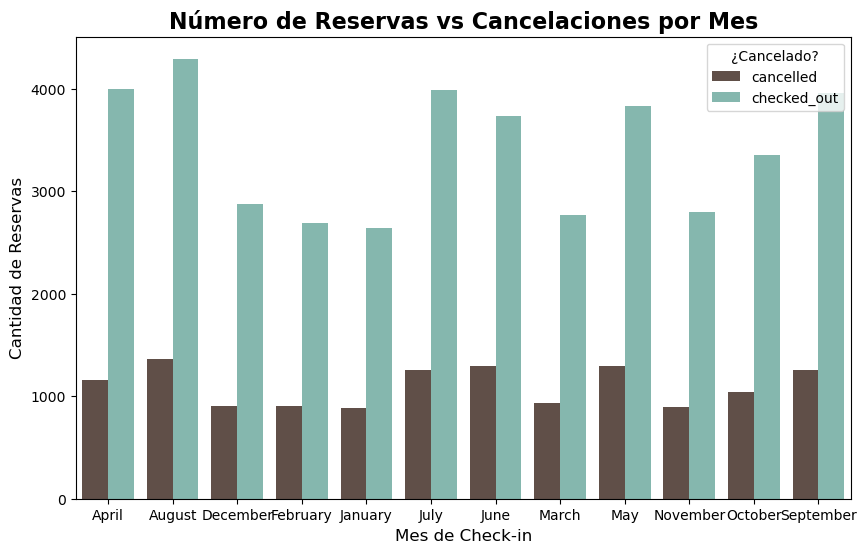

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
paleta_colores = ['#644D44','#7DBFB3', '#AFBE84', '#C2A18A', '#B17C81']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=datos, x='checkin_month', hue='status', palette=paleta_colores)

plt.title('Número de Reservas vs Cancelaciones por Mes',  fontsize=16, fontweight='bold')
plt.xlabel('Mes de Check-in', fontsize=12)
plt.ylabel('Cantidad de Reservas', fontsize=12)
plt.legend(title='¿Cancelado?')
plt.show()
plt.savefig('Tasa de Cancelación por mes.png', dpi=250, bbox_inches='tight')

Variables a sacar:
- Estación del año
- Tipo de vacaciones (Semana santa, verano, navidades...)
- Antiguedad del asset (respecto a fecha reserva)
- Tasa desempleo mensual
- Tablas de mortalidad/enferemedades
- Last entry form antes, durante o despues de la reserva:del primer dia contándolo hacia atrás, durante la estancia y ultimo dia, después del ultimo dia
- Revisar bien DUPLICADOS
- NAs nos la pelan un poco

In [36]:
datos[datos['reservation_net_value'] > 180_000]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
53820,2023-04-05 13:04:00,2023-04-22 11:30:00,2023-08-01 11:00:00,17,101,April,Saturday,4,0,telephone,...,5,True,True,109,184758.86,1829.3,checked_out,NaT,NaN,NaN


In [37]:
datos[datos['booked_at'] == datos['checkin_time']]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
36906,2023-08-25 15:00:00,2023-08-25 15:00:00,2023-08-26 11:00:00,0,1,August,Friday,2,0,channel_manager,...,1,False,False,0,116.23,116.23,checked_out,NaT,NaN,NaN
43424,2023-02-14 15:00:00,2023-02-14 15:00:00,2023-02-16 12:00:00,0,2,February,Tuesday,1,0,direct_channel,...,1,False,False,0,29.38,14.69,checked_out,NaT,NaN,NaN
49661,2023-09-12 15:00:00,2023-09-12 15:00:00,2023-09-13 12:00:00,0,1,September,Tuesday,1,0,direct_channel,...,2,False,False,0,20.00,20.00,checked_out,NaT,NaN,NaN


In [38]:
# Comprobación: los missing en cancelled_at solo deben ser reservas activas
missing_cancelled_at = datos['cancelled_at'].isna()
if missing_cancelled_at.sum() > 0:
    # Verificamos que estas reservas tengan STATUS distinto a cancelada
    inconsistencies = datos[missing_cancelled_at & (datos['status'] == 'cancelled')]
    if not inconsistencies.empty:
        print("Alerta: Hay reservas marcadas como 'Cancelled' pero CANCELLED_AT está vacío:")
        print(inconsistencies[['status','checking_time','booked_at']])
    else:
        print("Todos los missing en CANCELLED_AT corresponden a reservas activas.")
        
# Crear columna binaria solo si la comprobación es correcta
datos['cancelled'] = datos['cancelled_at'].notna().astype(int)

Todos los missing en CANCELLED_AT corresponden a reservas activas.


In [39]:
# Comprobación: si TOTAL_ADR coincide aproximadamente con RESERVATION_NET_VALUE / LENGHT_OF_STAY
datos['calc_total_adr'] = datos['reservation_net_value'] / datos['lenght_of_stay']

mismatch = datos[abs(datos['total_adr'] - datos['calc_total_adr']) > 0.01]  # tolerancia pequeña
if not mismatch.empty:
    print("Advertencia: TOTAL_ADR no coincide con RESERVATION_NET_VALUE / LENGHT_OF_STAY en estas filas:")
    print(mismatch[['total_adr','reservation_net_value','lenght_of_stay']])
else:
    print("TOTAL_ADR y RESERVATION_NET_VALUE / LENGHT_OF_STAY coinciden para todas las filas.")

TOTAL_ADR y RESERVATION_NET_VALUE / LENGHT_OF_STAY coinciden para todas las filas.


In [40]:
# Comprobación: los last_entry_form completados deberían ser antes de la cancelación si hay cancelación
datos['last_entry_form_completed_at'] = pd.to_datetime(datos['last_entry_form_completed_at'])
datos['cancelled_at'] = pd.to_datetime(datos['cancelled_at'])

problem_rows = datos[(datos['cancelled'] == 1) & (datos['last_entry_form_completed_at'] > datos['cancelled_at'])]
if not problem_rows.empty:
    print("Alerta: Algunas reservas canceladas tienen LAST_ENTRY_FORM_COMPLETED_AT posterior a CANCELLED_AT:")
    print(problem_rows[['last_entry_form_completed_at','cancelled_at']])
else:
    print("Todos los last_entry_form completados son coherentes con CANCELLED_AT.")

Alerta: Algunas reservas canceladas tienen LAST_ENTRY_FORM_COMPLETED_AT posterior a CANCELLED_AT:
      last_entry_form_completed_at        cancelled_at
4398           2023-06-04 10:21:00 2023-06-02 16:35:00
5051           2023-06-20 13:02:00 2023-06-17 11:14:00
13037          2023-02-26 20:57:00 2023-02-26 20:43:00
16409          2023-05-24 17:33:00 2023-05-23 05:03:00
24303          2023-12-06 16:37:00 2023-10-24 15:46:00
26672          2023-10-27 15:19:00 2023-10-26 07:45:00
26931          2023-02-02 15:22:00 2023-02-02 11:21:00
28725          2023-02-22 14:27:00 2023-02-22 14:24:00
32013          2022-12-23 17:44:00 2022-12-23 09:39:00
36286          2023-07-31 08:16:00 2023-07-30 16:54:00
42414          2023-01-01 11:48:00 2023-01-01 11:36:00
43956          2023-03-06 15:08:00 2023-03-06 15:05:00
45819          2023-04-25 08:58:00 2023-04-25 06:04:00
48599          2023-07-28 12:22:00 2023-07-28 12:04:00


In [41]:
datos.describe()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,adult_count,child_count,asset_opening_date,available_units,completed_entry_forms_count,last_entry_form_completed_at,recurrence,product_count,reservation_net_value,total_adr,cancelled_at,cancellation_lead_time,cancelled,calc_total_adr
count,54117,54117,54117,54117.00000,54117.000000,54117.000000,54117.000000,54117,54117.000000,52161.000000,40484,54117.000000,54117.000000,54117.000000,54116.000000,13202,13202.000000,54117.000000,54116.000000
mean,2023-06-04 17:13:47.841898240,2023-07-04 14:01:00.423526656,2023-07-07 05:33:02.572204544,29.85256,2.789641,2.132546,0.311196,2021-06-28 17:11:36.291368704,86.883918,1.567359,2023-06-30 22:11:40.967295488,1.545928,0.812684,263.847497,100.521519,2023-06-03 12:00:13.861536,18.785942,0.243953,100.520899
min,2020-11-09 16:28:00,2023-01-01 11:00:00,2023-01-02 11:00:00,-7.00000,0.000000,0.000000,0.000000,2020-03-01 00:00:00,7.000000,0.000000,2021-12-14 10:17:00,1.000000,0.000000,-7191.460000,-3595.730000,2020-11-09 16:30:00,0.000000,0.000000,-3595.730000
25%,2023-03-14 21:36:00,2023-04-15 15:00:00,2023-04-18 11:00:00,3.00000,1.000000,1.000000,0.000000,2020-12-21 00:00:00,34.000000,1.000000,2023-04-11 20:21:30,1.000000,0.000000,66.810000,43.820000,2023-03-08 11:30:45,0.000000,0.000000,43.818750
50%,2023-06-05 00:23:00,2023-07-07 15:00:00,2023-07-10 11:00:00,11.00000,2.000000,2.000000,0.000000,2021-07-16 00:00:00,120.000000,1.000000,2023-07-03 14:33:30,1.000000,0.000000,137.450000,88.425000,2023-06-03 12:14:00,2.000000,0.000000,88.425000
75%,2023-09-04 05:47:00,2023-09-20 15:00:00,2023-09-24 11:00:00,33.00000,3.000000,2.000000,0.000000,2022-07-20 00:00:00,128.000000,2.000000,2023-09-17 17:03:30,1.000000,1.000000,297.720000,134.540000,2023-08-31 11:15:45,16.000000,0.000000,134.540000
max,2023-12-31 21:47:00,2023-12-31 15:00:00,2024-08-31 11:00:00,899.00000,489.000000,10.000000,8.000000,2022-08-30 00:00:00,135.000000,10.000000,2023-12-31 22:59:00,116.000000,109.000000,184758.860000,2872.760000,2024-01-01 08:07:00,374.000000,1.000000,2872.760000
std,NaN,NaN,NaN,51.34134,7.010550,1.336904,0.738753,NaN,51.867627,1.363818,NaN,4.222692,1.979215,934.649646,84.956595,NaN,42.398349,0.429469,84.956571


In [42]:
df_temp = datos.copy()

def get_season(date):
    m = date.month
    if m in [12, 1, 2]:
        return "winter"
    elif m in [3, 4, 5]:
        return "spring"
    elif m in [6, 7, 8]:
        return "summer"
    else:
        return "autumn"

df_temp['season'] = df_temp['booked_at'].apply(get_season)

def get_holiday_type(date):
    m, d = date.month, date.day

    if (m == 12 and d >= 20) or (m == 1 and d <= 6):
        return "christmas"
    elif m in [7, 8]:
        return "summer"
    elif m == 4:
        return "easter"   # aproximación semana santa
    elif m in [5, 6, 9]:
        return "bridge_or_holiday"
    else:
        return "none"

df_temp['holiday_type'] = df_temp['checkin_time'].apply(get_holiday_type)


df_temp['asset_age_days'] = (
    df_temp['booked_at'] - df_temp['asset_opening_date']
).dt.days

# seguridad: no puede ser negativa
df_temp.loc[df_temp['asset_age_days'] < 0, 'asset_age_days'] = np.nan

def entry_form_timing(row):
    last = row['last_entry_form_completed_at']
    checkin = row['checkin_time']
    checkout = row['checkout_time']

    if pd.isna(last):
        return "not_completed"
    elif last < checkin:
        return "before_checkin"
    elif checkin <= last <= checkout:
        return "during_stay"
    else:
        return "after_checkout"

df_temp['entry_form_timing'] = df_temp.apply(entry_form_timing, axis=1)


duplicate_cols = [
    'booked_at',
    'checkin_time',
    'checkout_time',
    'asset',
    'origin',
    'adult_count',
    'child_count'
]

df_temp['is_duplicate'] = df_temp.duplicated(
    subset=duplicate_cols,
    keep='first'
).astype(int)

df_temporal_features = df_temp[
    [
        'season',
        'holiday_type',
        'asset_age_days',
        'entry_form_timing',
        'is_duplicate'
    ]
]

print(df_temporal_features)

       season holiday_type  asset_age_days entry_form_timing  is_duplicate
0      autumn    christmas          1000.0    before_checkin             0
1      winter    christmas          1025.0    before_checkin             0
2      autumn    christmas           934.0    before_checkin             0
3      autumn    christmas           937.0    before_checkin             0
4      autumn    christmas           961.0    before_checkin             0
...       ...          ...             ...               ...           ...
56443  autumn    christmas           409.0    before_checkin             0
56444  autumn    christmas           409.0    before_checkin             1
56445  autumn    christmas           413.0    before_checkin             0
56446  autumn    christmas           413.0    before_checkin             0
56447  winter    christmas           487.0    before_checkin             0

[54117 rows x 5 columns]


In [43]:
ppr.guardar_objeto(obj=datos, nombre='datos_libere', destino='trf')

In [ ]:
#ppr.cargar_objeto(nombre='datos_libere', origen='trf')

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time,cancelled,calc_total_adr
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,False,0,15.92,15.92,checked_out,NaT,NaN,NaN,0,15.920000
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,False,0,117.78,13.09,checked_out,NaT,NaN,NaN,0,13.086667
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,True,8,755.65,125.94,checked_out,NaT,NaN,NaN,0,125.941667
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,True,1,186.37,186.37,checked_out,NaT,NaN,NaN,0,186.370000
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,False,0,77.02,77.02,checked_out,NaT,NaN,NaN,0,77.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56443,2023-10-13 13:38:00,2023-12-31 15:00:00,2024-01-01 11:00:00,79,1,December,Sunday,4,0,telephone,...,False,0,169.60,169.60,checked_out,NaT,NaN,NaN,0,169.600000
56444,2023-10-13 13:38:00,2023-12-31 15:00:00,2024-01-01 11:00:00,79,1,December,Sunday,4,0,telephone,...,False,0,169.60,169.60,checked_out,NaT,NaN,NaN,0,169.600000
56445,2023-10-17 08:36:00,2023-12-31 15:00:00,2024-01-01 11:00:00,75,1,December,Sunday,5,0,direct_channel,...,False,0,647.28,647.28,checked_out,NaT,NaN,NaN,0,647.280000
56446,2023-10-17 08:36:00,2023-12-31 15:00:00,2024-01-01 11:00:00,75,1,December,Sunday,4,0,direct_channel,...,False,0,732.73,732.73,checked_out,NaT,NaN,NaN,0,732.730000
